## <div align="center">Prediksi Deteksi Penyakit Kanker Payudara dengan Menggunakan Algoritma Decision Tree C4.5</div>
---

##### <div align="left">Disusun Oleh Kelompok 1:</div>
Kevin Aditya Hartono - 00000069875  
Nathan Vilbert Kosasih - 00000069903  
Ray Anthony Pranoto - 00000066655  
Fiena Gunawan - 00000069579  

---

#### <div align="center">Semester Genap 2022/2023</div>

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("BCdataset full.csv", sep=',')
df

,Age,Residence_Location,Alcohol_Intake,Smoking_Status,Family_history_of_breast_cancer,Number_of_children,Age_at_menarche,Menopausal_Status,Hormone_replacement_therapy_use,Oral_contraceptive_use,...,Breast_Pain,Breast_Biopsy,Weight,Height,BMI,Obesity,Exposure_to_radiation,Occupation,Breast_Feeding,Diagnosis_Status
0,32,2,0,0,0,0,13,1,0,0,...,0,1,55.0,151.0,24.1,0,0,1,1,Benign
1,60,2,0,0,0,12,16,3,0,0,...,0,0,57.0,158.0,22.8,0,0,3,1,Benign
2,44,3,0,0,0,0,16,2,1,1,...,0,1,65.0,151.0,28.5,0,0,2,0,Benign
3,74,1,1,1,0,5,13,4,0,0,...,0,0,49.0,156.0,20.1,0,1,1,1,Benign
4,64,1,0,0,0,0,14,4,0,0,...,1,0,49.0,153.0,20.9,0,0,2,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,54,1,1,1,1,5,15,3,0,0,...,1,0,63.2,158.6,25.1,0,1,2,1,Malignancy
1893,39,1,0,0,0,6,12,1,0,0,...,0,0,64.4,159.4,25.3,0,0,1,1,Malignancy
1894,42,3,1,0,0,4,12,2,1,1,...,1,0,56.5,165.5,20.6,0,0,1,1,Malignancy
1895,35,1,0,0,1,2,14,1,0,0,...,1,0,63.2,158.6,25.1,0,1,1,1,Malignancy


## Data Understanding

In [3]:
df.shape

(1897, 22)

In [4]:
df.isnull().sum()

Age                                0
Residence_Location                 0
Alcohol_Intake                     0
Smoking_Status                     0
Family_history_of_breast_cancer    0
Number_of_children                 0
Age_at_menarche                    0
Menopausal_Status                  0
Hormone_replacement_therapy_use    0
Oral_contraceptive_use             0
Breast_Swelling                    0
Breast_Lump                        0
Breast_Pain                        0
Breast_Biopsy                      0
Weight                             0
Height                             0
BMI                                0
Obesity                            0
Exposure_to_radiation              0
Occupation                         0
Breast_Feeding                     0
Diagnosis_Status                   0
dtype: int64

Melakukan pengecekan pada masing masing kolom mengenai missing value, dari output diatas dapat disimpulkan tidak terdapat missing value pada dataset tersebut

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1897 non-null   int64  
 1   Residence_Location               1897 non-null   int64  
 2   Alcohol_Intake                   1897 non-null   int64  
 3   Smoking_Status                   1897 non-null   int64  
 4   Family_history_of_breast_cancer  1897 non-null   int64  
 5   Number_of_children               1897 non-null   int64  
 6   Age_at_menarche                  1897 non-null   int64  
 7   Menopausal_Status                1897 non-null   int64  
 8   Hormone_replacement_therapy_use  1897 non-null   int64  
 9   Oral_contraceptive_use           1897 non-null   int64  
 10  Breast_Swelling                  1897 non-null   int64  
 11  Breast_Lump                      1897 non-null   int64  
 12  Breast_Pain         

In [6]:
df.describe()

,Age,Residence_Location,Alcohol_Intake,Smoking_Status,Family_history_of_breast_cancer,Number_of_children,Age_at_menarche,Menopausal_Status,Hormone_replacement_therapy_use,Oral_contraceptive_use,...,Breast_Lump,Breast_Pain,Breast_Biopsy,Weight,Height,BMI,Obesity,Exposure_to_radiation,Occupation,Breast_Feeding
count,1897.000000,1897.000000,1897.000000,1897.00000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,...,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000
mean,48.605693,1.726937,0.352135,0.09805,0.177649,3.422773,13.748550,2.491302,0.177122,0.173432,...,0.506589,0.422773,0.251977,63.359884,159.900474,24.796468,0.111755,0.319452,1.465999,0.801265
std,14.916700,1.013244,0.477762,0.29746,0.382318,3.018136,1.278898,1.107632,0.381872,0.378720,...,0.500088,0.494130,0.434262,10.678218,6.366848,4.138777,0.315148,0.466387,0.742067,0.399153
min,14.000000,1.000000,0.000000,0.00000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,35.000000,137.100000,14.200000,0.000000,0.000000,1.000000,0.000000
25%,36.000000,1.000000,0.000000,0.00000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,56.500000,156.000000,22.200000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,1.000000,0.000000,0.00000,0.000000,3.000000,13.000000,3.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,63.200000,158.600000,24.800000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,1.000000,0.00000,0.000000,5.000000,14.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,67.000000,164.000000,26.300000,0.000000,1.000000,2.000000,1.000000
max,85.000000,5.000000,1.000000,1.00000,1.000000,20.000000,20.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,109.000000,179.000000,44.100000,1.000000,1.000000,3.000000,1.000000


## Data Preprocessing

In [7]:
# Proses Encoding
df['Alcohol_Intake'] = df['Alcohol_Intake'].replace({1: 'low', 0: 'high'})
df['Smoking_Status'] = df['Smoking_Status'].replace({1: 'non-smoker', 0: 'smoker'})
df['Family_history_of_breast_cancer'] = df['Family_history_of_breast_cancer'].replace({1: 'no', 0: 'yes'})
df['Menopausal_Status'] = df['Menopausal_Status'].replace({1: 'Premenopause', 2: 'Perimenopause', 
                                                           3:'Menopause', 4:'Postmenopause'})
df['Hormone_replacement_therapy_use'] = df['Hormone_replacement_therapy_use'].replace({1: 'no', 0: 'yes'})
df['Oral_contraceptive_use'] = df['Oral_contraceptive_use'].replace({1: 'no', 0: 'yes'})
df['Obesity'] = df['Obesity'].replace({0: 'obesity', 1: 'non-obesity'})  
df['Exposure_to_radiation'] = df['Exposure_to_radiation'].replace({1: 'no', 0: 'yes'})

In [8]:
df['Breast_Swelling'] = df['Breast_Swelling'].replace({1: 'no', 0: 'yes'})
df['Breast_Lump'] = df['Breast_Lump'].replace({1: 'no', 0: 'yes'})
df['Breast_Pain'] = df['Breast_Pain'].replace({1: 'no', 0: 'yes'})
df['Breast_Feeding'] = df['Breast_Feeding'].replace({1: 'no', 0: 'yes'})

Melakukan proses encoding pada masing masing kolom yang diperlukan yang betujuan untuk dapat divisualisasikan lebih jelas

In [9]:
df.head()

,Age,Residence_Location,Alcohol_Intake,Smoking_Status,Family_history_of_breast_cancer,Number_of_children,Age_at_menarche,Menopausal_Status,Hormone_replacement_therapy_use,Oral_contraceptive_use,...,Breast_Pain,Breast_Biopsy,Weight,Height,BMI,Obesity,Exposure_to_radiation,Occupation,Breast_Feeding,Diagnosis_Status
0,32,2,high,smoker,yes,0,13,Premenopause,yes,yes,...,yes,1,55.0,151.0,24.1,obesity,yes,1,no,Benign
1,60,2,high,smoker,yes,12,16,Menopause,yes,yes,...,yes,0,57.0,158.0,22.8,obesity,yes,3,no,Benign
2,44,3,high,smoker,yes,0,16,Perimenopause,no,no,...,yes,1,65.0,151.0,28.5,obesity,yes,2,yes,Benign
3,74,1,low,non-smoker,yes,5,13,Postmenopause,yes,yes,...,yes,0,49.0,156.0,20.1,obesity,no,1,no,Benign
4,64,1,high,smoker,yes,0,14,Postmenopause,yes,yes,...,no,0,49.0,153.0,20.9,obesity,yes,2,no,Benign


In [10]:
df['Menopausal_Status'].value_counts()

Menopause        760
Premenopause     560
Postmenopause    366
Perimenopause    211
Name: Menopausal_Status, dtype: int64

<Axes: >

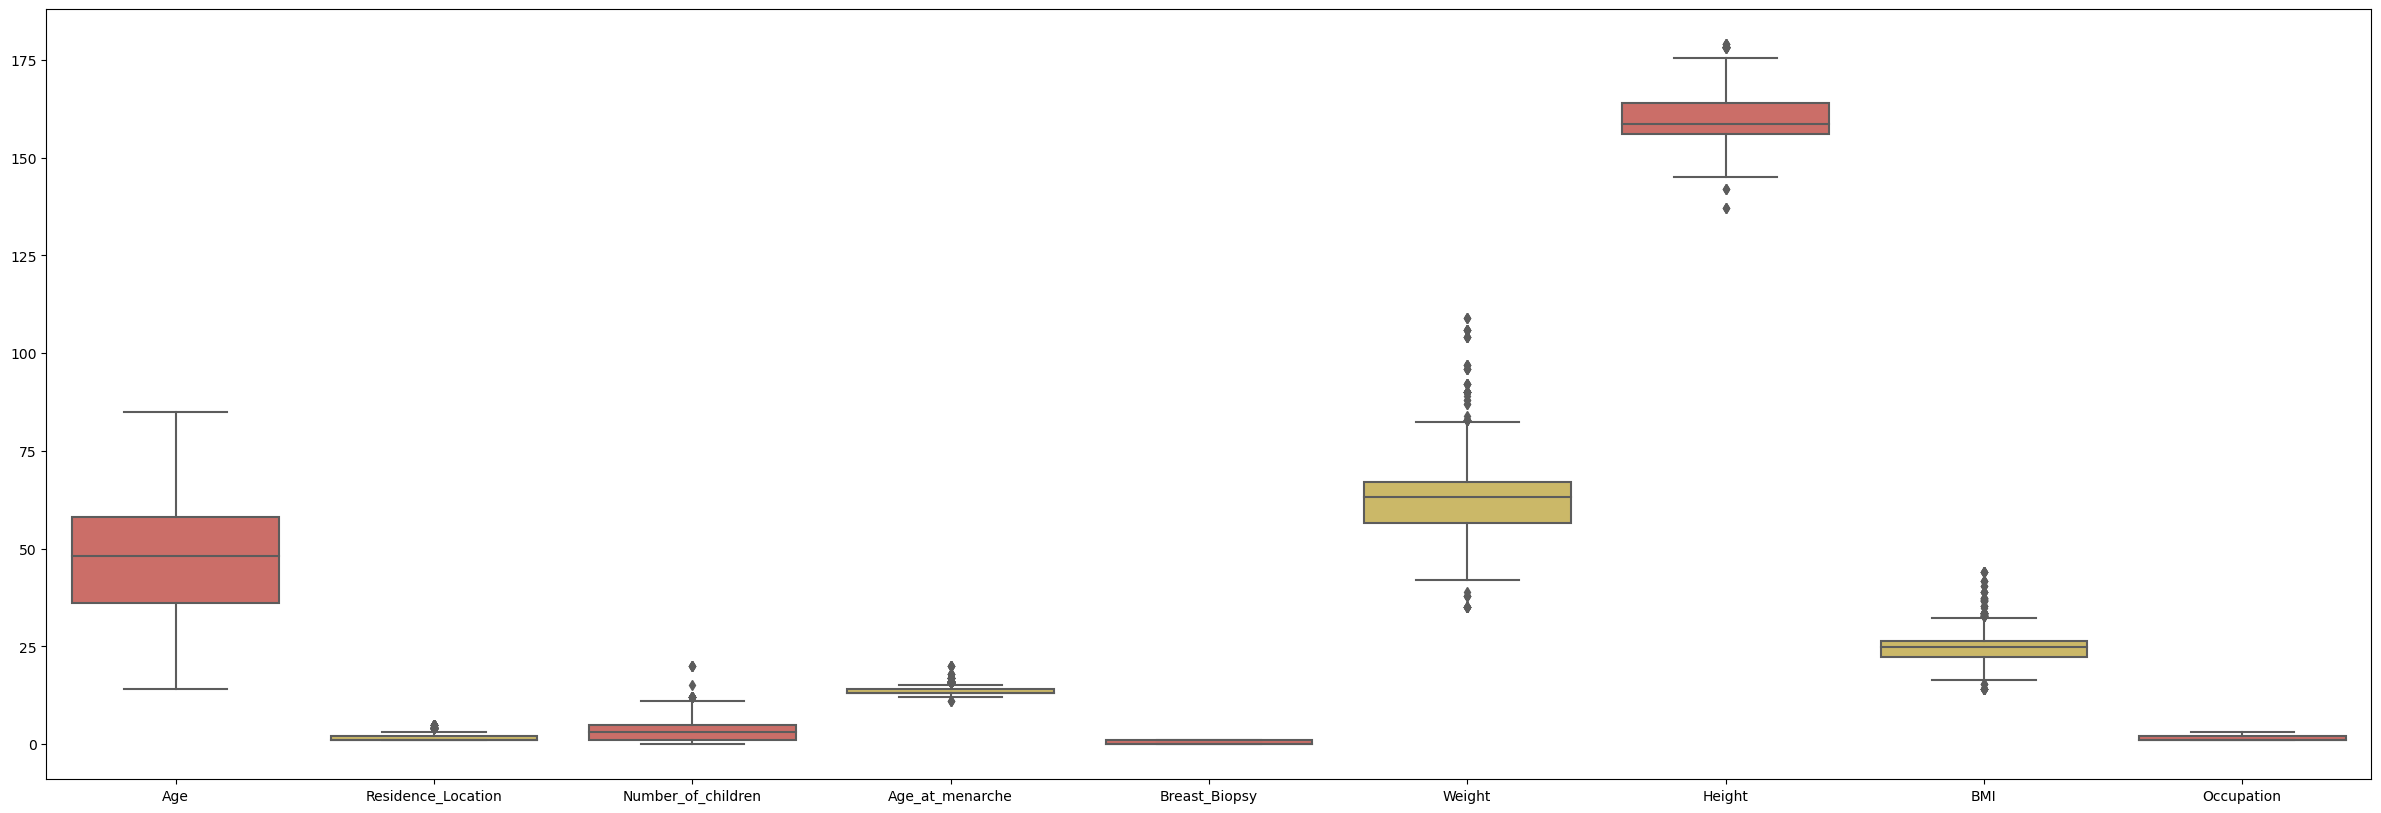

In [11]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=df, palette=('#db5f57','#dbc257'))

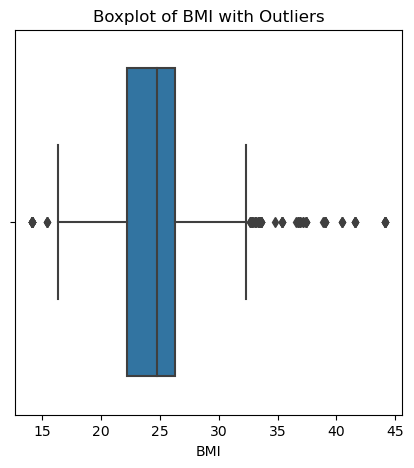

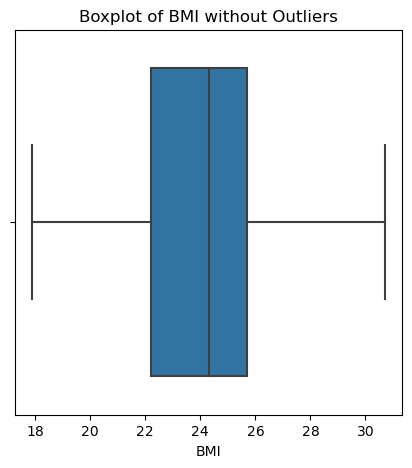

Shape of data without outliers: (1725, 22)


In [12]:
Q1 = df['BMI'].quantile(q=0.25)
Q3 = df['BMI'].quantile(q=0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# visualisasi Boxplot waktu masih terdapat outlier
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI with Outliers')
plt.show()

# Menghilangkan Outlier
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

# Visualisasi Boxplot sesudah Outlier hilang
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI without Outliers')
plt.show()

# Jumlah data ketika Outlier sudah hilang
print("Shape of data without outliers:", df.shape)


Proses diatas adalah menghilangkan outlier pada kolom kolom yang digunakan, berdasarkan hasil diatas kolom 'Age' dan 'BMI' sudah berhasil dihilangkan outlier nya

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Residence_Location'}>,
        <Axes: title={'center': 'Number_of_children'}>],
       [<Axes: title={'center': 'Age_at_menarche'}>,
        <Axes: title={'center': 'Breast_Biopsy'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Occupation'}>]], dtype=object)

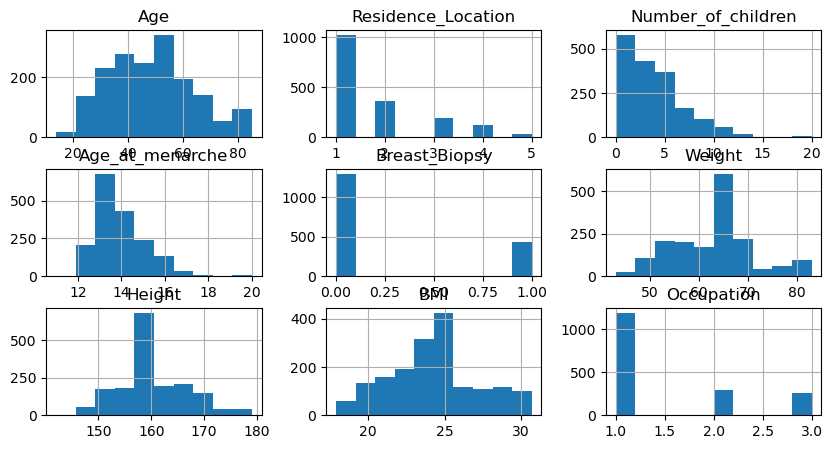

In [13]:
plt.rcParams['figure.figsize'] = (10,5)
df.hist()

## Feature Engineering (Selection)

In [14]:
df = df.drop(columns=['Residence_Location', 'Number_of_children', 'Age_at_menarche', 
                      'Occupation', 'Breast_Biopsy', 'Weight', 'Height'])

Menghapus beberapa kolom yang tidak diperlukan

## Exploratory Data Analysis

In [15]:
def visualisasi(feature):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df, x=df[feature], hue='Diagnosis_Status', palette=colors)
    plt.grid(alpha=0.4)
    plt.title(f'Distribution of Malignacy and Benign Patients by {feature}', fontsize=15)
    
    # Ukuran Font label sumbu x dan y
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    # Legend
    plt.legend(fontsize=10)
    
    # Nilai pada bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    plt.show()

    # Contingency Table
    contingency_table = pd.crosstab(df[feature], df['Diagnosis_Status'])
    print('Contingency Table: ')
    display(contingency_table)

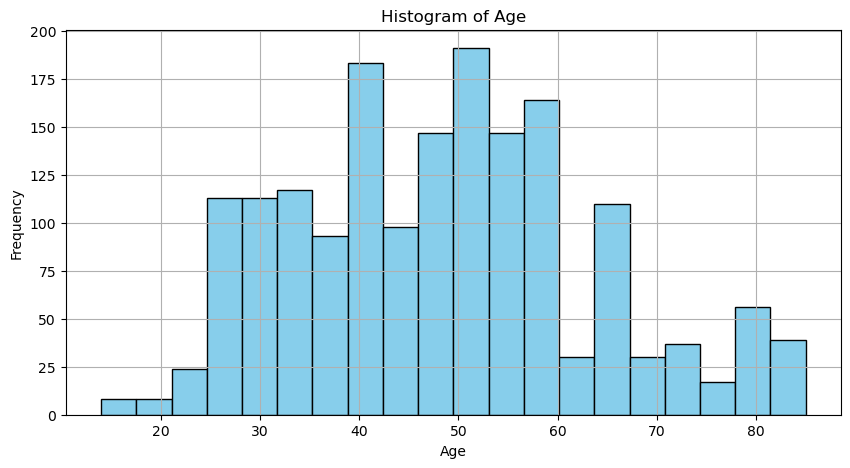

In [16]:
# Menambahkan label dan judul
plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
# Menampilkan histogram
plt.grid(True)
plt.show()

histogram ini menunjukan dari masing-masing featurenya, digunakan untuk melihat distribusi data dari masing- masing feature

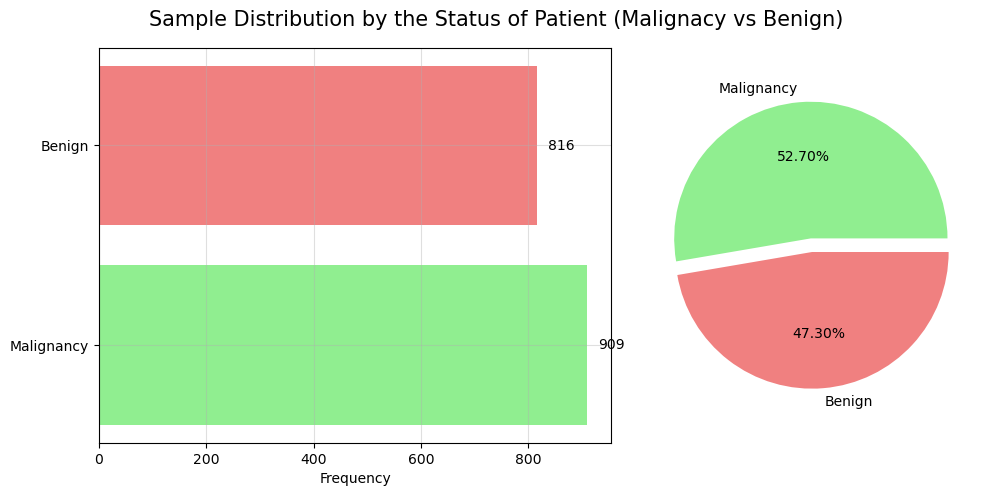

In [17]:
# Code Visualisasi Barplot dan PieChart status Diagnosis
status = df['Diagnosis_Status'].value_counts()
colors = ['lightgreen','lightcoral']

figure, axes = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=status.index, width=status.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(status):
    axes[0].text(values+20, index, str(values), va='center')

axes[0].grid(alpha=0.4)

axes[1].pie(status.values, labels=status.index, autopct='%.2f%%', explode=([0.05]*len(status.index)), colors=colors)
figure.suptitle('Sample Distribution by the Status of Patient (Malignacy vs Benign)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

Untuk melihat jumlah masing-masing kelas dari feature target

Untuk melihat kelas fitur Race

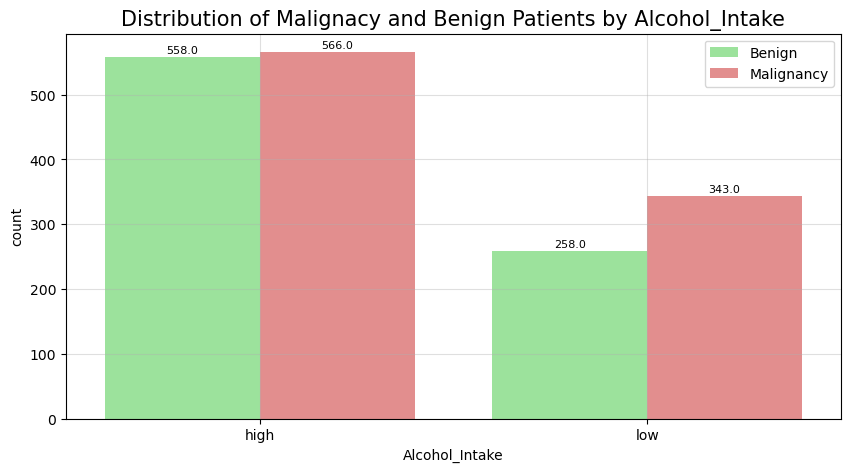

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Alcohol_Intake,,
high,558,566
low,258,343


In [18]:
visualisasi('Alcohol_Intake')

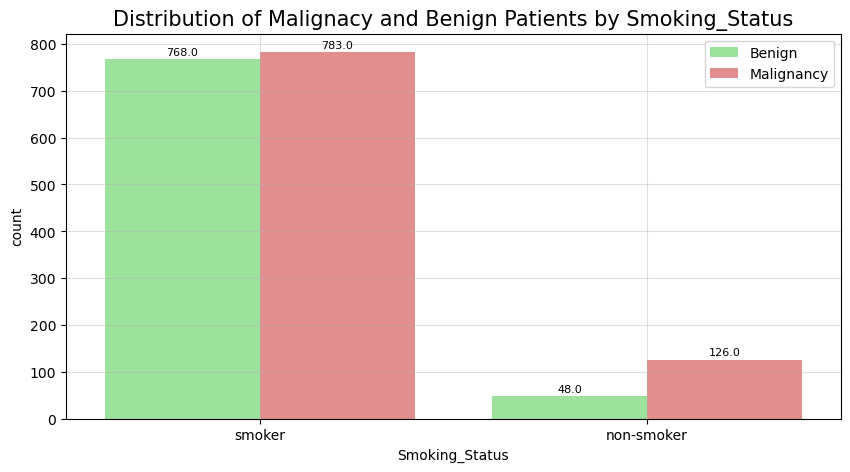

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Smoking_Status,,
non-smoker,48,126
smoker,768,783


In [19]:
visualisasi('Smoking_Status')

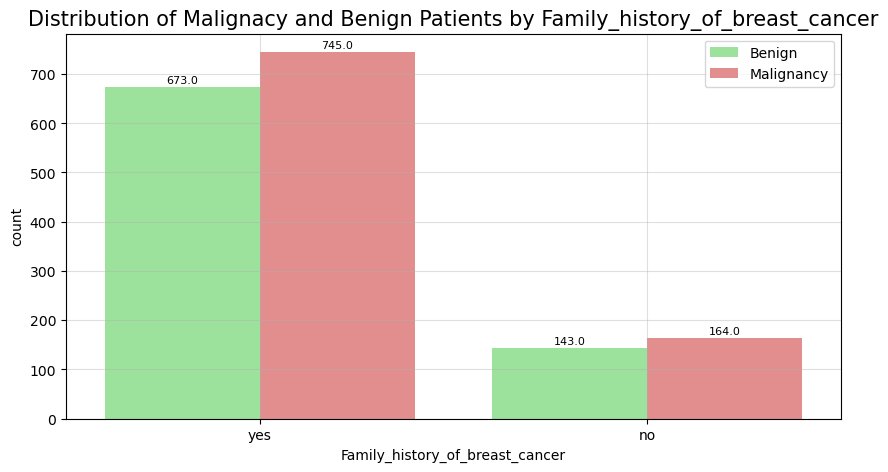

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Family_history_of_breast_cancer,,
no,143,164
yes,673,745


In [20]:
visualisasi('Family_history_of_breast_cancer')

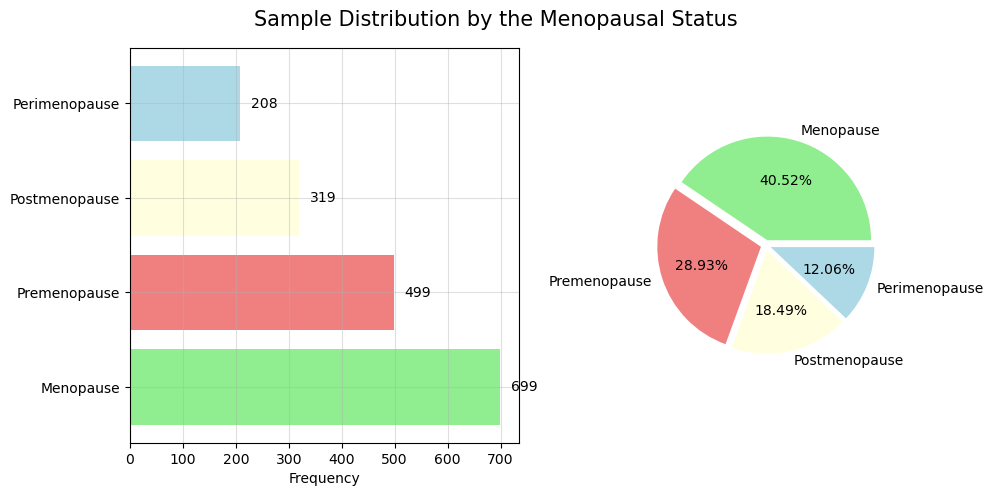

In [21]:
# Code Visualisasi Barplot dan PieChart status Menopausal
status = df['Menopausal_Status'].value_counts()
colors = ['lightgreen','lightcoral','lightyellow','lightblue']

figure, axes = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=status.index, width=status.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(status):
    axes[0].text(values+20, index, str(values), va='center')

axes[0].grid(alpha=0.4)

axes[1].pie(status.values, labels=status.index, autopct='%.2f%%', explode=([0.05]*len(status.index)), colors=colors)
figure.suptitle('Sample Distribution by the Menopausal Status', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [22]:
df.head()

,Age,Alcohol_Intake,Smoking_Status,Family_history_of_breast_cancer,Menopausal_Status,Hormone_replacement_therapy_use,Oral_contraceptive_use,Breast_Swelling,Breast_Lump,Breast_Pain,BMI,Obesity,Exposure_to_radiation,Breast_Feeding,Diagnosis_Status
0,32,high,smoker,yes,Premenopause,yes,yes,yes,no,yes,24.1,obesity,yes,no,Benign
1,60,high,smoker,yes,Menopause,yes,yes,yes,yes,yes,22.8,obesity,yes,no,Benign
2,44,high,smoker,yes,Perimenopause,no,no,yes,yes,yes,28.5,obesity,yes,yes,Benign
3,74,low,non-smoker,yes,Postmenopause,yes,yes,no,no,yes,20.1,obesity,no,no,Benign
4,64,high,smoker,yes,Postmenopause,yes,yes,yes,yes,no,20.9,obesity,yes,no,Benign


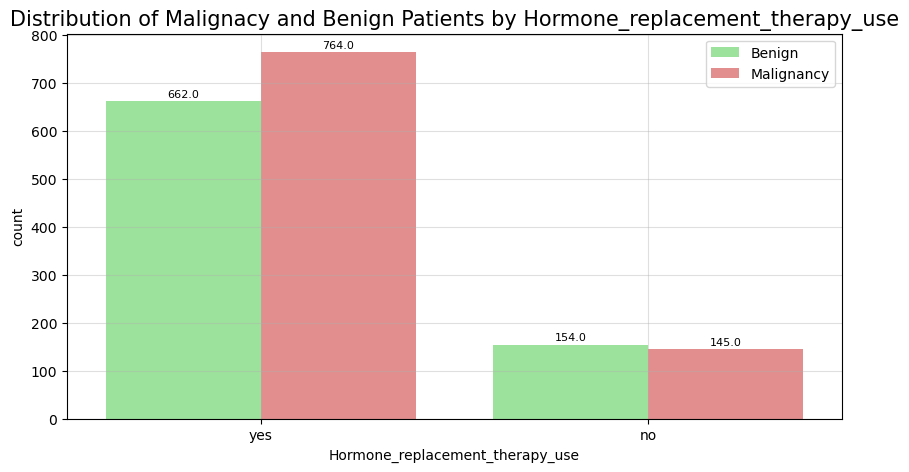

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Hormone_replacement_therapy_use,,
no,154,145
yes,662,764


In [23]:
visualisasi('Hormone_replacement_therapy_use')

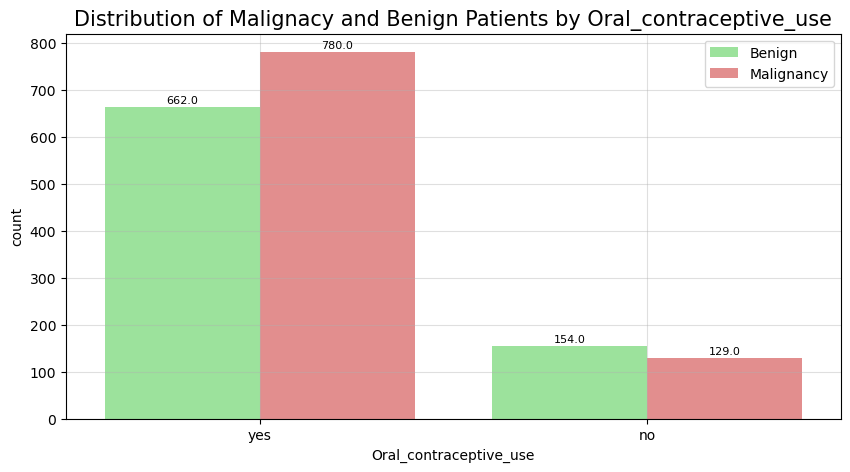

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Oral_contraceptive_use,,
no,154,129
yes,662,780


In [24]:
visualisasi('Oral_contraceptive_use')

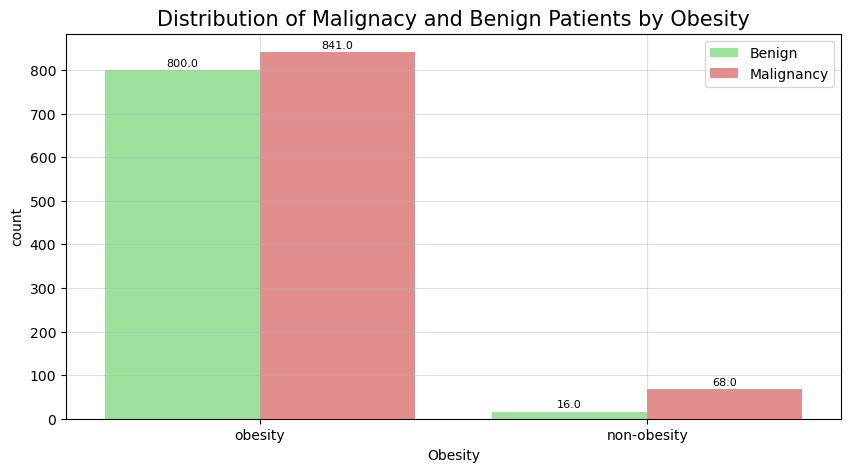

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Obesity,,
non-obesity,16,68
obesity,800,841


In [25]:
visualisasi('Obesity')

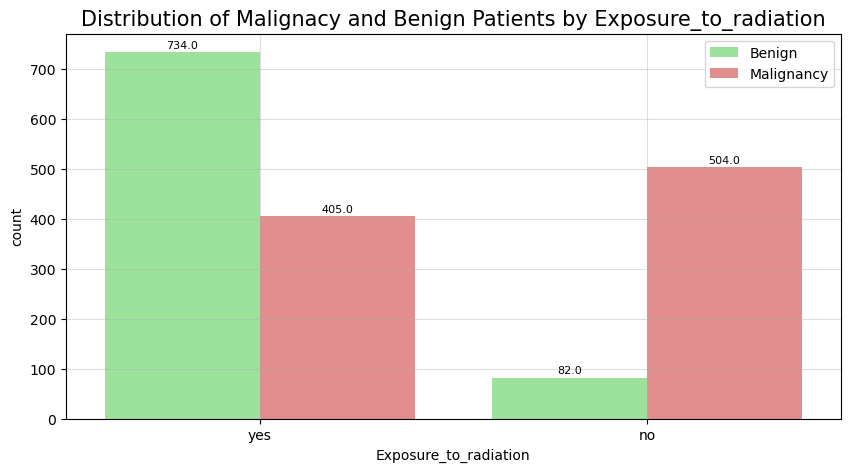

Contingency Table: 


Diagnosis_Status,Benign,Malignancy
Exposure_to_radiation,,
no,82,504
yes,734,405


In [26]:
visualisasi('Exposure_to_radiation')

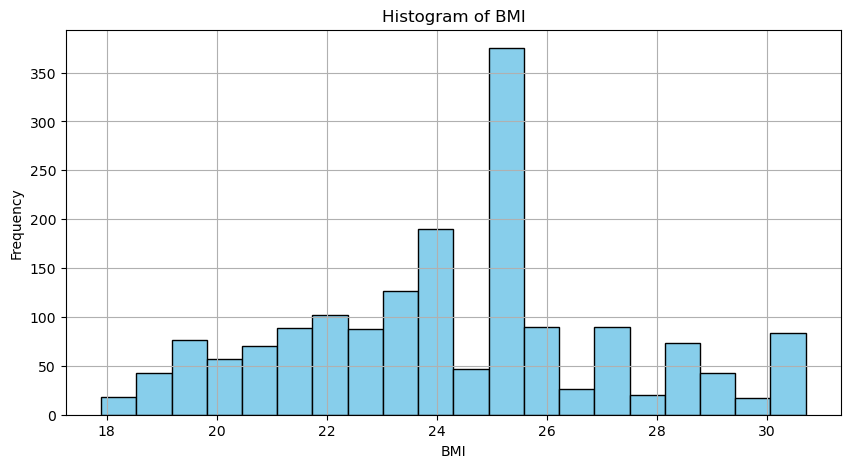

In [27]:
# Menambahkan label dan judul
plt.figure(figsize=(10,5))
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
# Menampilkan histogram
plt.grid(True)
plt.show()

In [28]:
# Membuat objek LabelEncoder
encoding = LabelEncoder()
# Proses Encoding
df['Alcohol_Intake'] = df['Alcohol_Intake'].replace({'low' : 1, 'high' : 0})
df['Smoking_Status'] = df['Smoking_Status'].replace({'non-smoker': 1, 'smoker': 0})
df['Family_history_of_breast_cancer'] = df['Family_history_of_breast_cancer'].replace({'no' : 1, 'yes' : 0})
df['Menopausal_Status'] = df['Menopausal_Status'].replace({'Premenopause' : 0, 'Perimenopause' : 1, 
                                                           'Menopause' : 2, 'Postmenopause' : 3})
df['Hormone_replacement_therapy_use'] = df['Hormone_replacement_therapy_use'].replace({'no' : 1, 'yes' : 0})
df['Oral_contraceptive_use'] = df['Oral_contraceptive_use'].replace({'no' : 1, 'yes' : 0})
df['Obesity'] = df['Obesity'].replace({'obesity' : 0, 'non-obesity' : 1})
df['Exposure_to_radiation'] = df['Exposure_to_radiation'].replace({'no' : 1, 'yes' : 0})
df["Diagnosis_Status"] = df['Diagnosis_Status'].replace({'Benign' : 1, 'Malignancy' : 0})

Proses diatas mengubah tipe dan variable yang awalnya berupa string yang digunakan untuk proses visualisasi, diubah kembali kebentuk encode agar dapat dilakukan proses modelling

In [29]:
data = df.drop(['Breast_Swelling','Breast_Lump','Breast_Pain','Breast_Feeding'], axis=1)
data

,Age,Alcohol_Intake,Smoking_Status,Family_history_of_breast_cancer,Menopausal_Status,Hormone_replacement_therapy_use,Oral_contraceptive_use,BMI,Obesity,Exposure_to_radiation,Diagnosis_Status
0,32,0,0,0,0,0,0,24.1,0,0,1
1,60,0,0,0,2,0,0,22.8,0,0,1
2,44,0,0,0,1,1,1,28.5,0,0,1
3,74,1,1,0,3,0,0,20.1,0,1,1
4,64,0,0,0,3,0,0,20.9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1892,54,1,1,1,2,0,0,25.1,0,1,0
1893,39,0,0,0,0,0,0,25.3,0,0,0
1894,42,1,0,0,1,1,1,20.6,0,0,0
1895,35,0,0,1,0,0,0,25.1,0,1,0


Melakukan drop kolom yang didak diperlukan

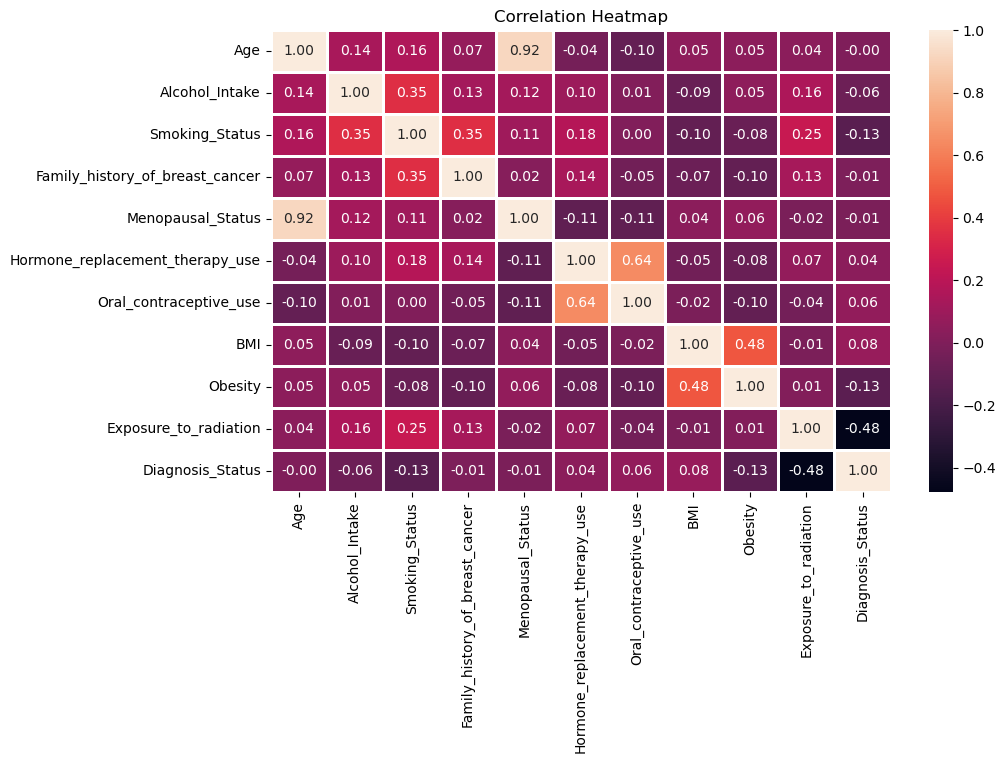

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Berdasarkan nilai akurasi diatas korelasi tinggi positif terdapat pada menopausal status dengan age dan oral contracetive use dengan hormone replacement therapy use. Kemudian korelasi tinggi negatif terdapat pada diagnosis status dengan exposure to radiation

## Data Splitting

In [31]:
X = data.drop(['Diagnosis_Status'], axis=1)
y = data['Diagnosis_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)
print(X_train.shape, X_test.shape)

(1207, 10) (518, 10)


Melakukan proses splitting dengan nilai x seluruh kolom selain kolom 'Diagnosis_Status' dan y dengan kolom 'Diagnosis_Status'. Kemudian nilai di split menjadi test 30% dan train 70% dengan random state sebesar 51

## Data Modelling

In [32]:
clf_c45_gini = DecisionTreeClassifier (max_depth=5, criterion='gini')
clf_c45_gini.fit(X_train, y_train)
y_pred_gini = clf_c45_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gini)

print("Accuracy on training set: {:.3f}".format(clf_c45_gini.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_c45_gini.score(X_test, y_test)))
print("Accuracy:", accuracy)

Accuracy on training set: 0.862
Accuracy on test set: 0.834
Accuracy: 0.833976833976834


In [33]:
clf_c45_entropy = DecisionTreeClassifier (max_depth=5, criterion='entropy')
clf_c45_entropy.fit(X_train, y_train)
y_pred_entropy = clf_c45_entropy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy on training set: {:.3f}".format(clf_c45_entropy.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_c45_entropy.score(X_test, y_test)))
print("Accuracy:", accuracy)

Accuracy on training set: 0.860
Accuracy on test set: 0.832
Accuracy: 0.832046332046332


Berdasarkan hasil akurasi pada training set dan test set, akurasi tertinggi terdapat pada criterion gini dibandingkan dengan criterion entropy.

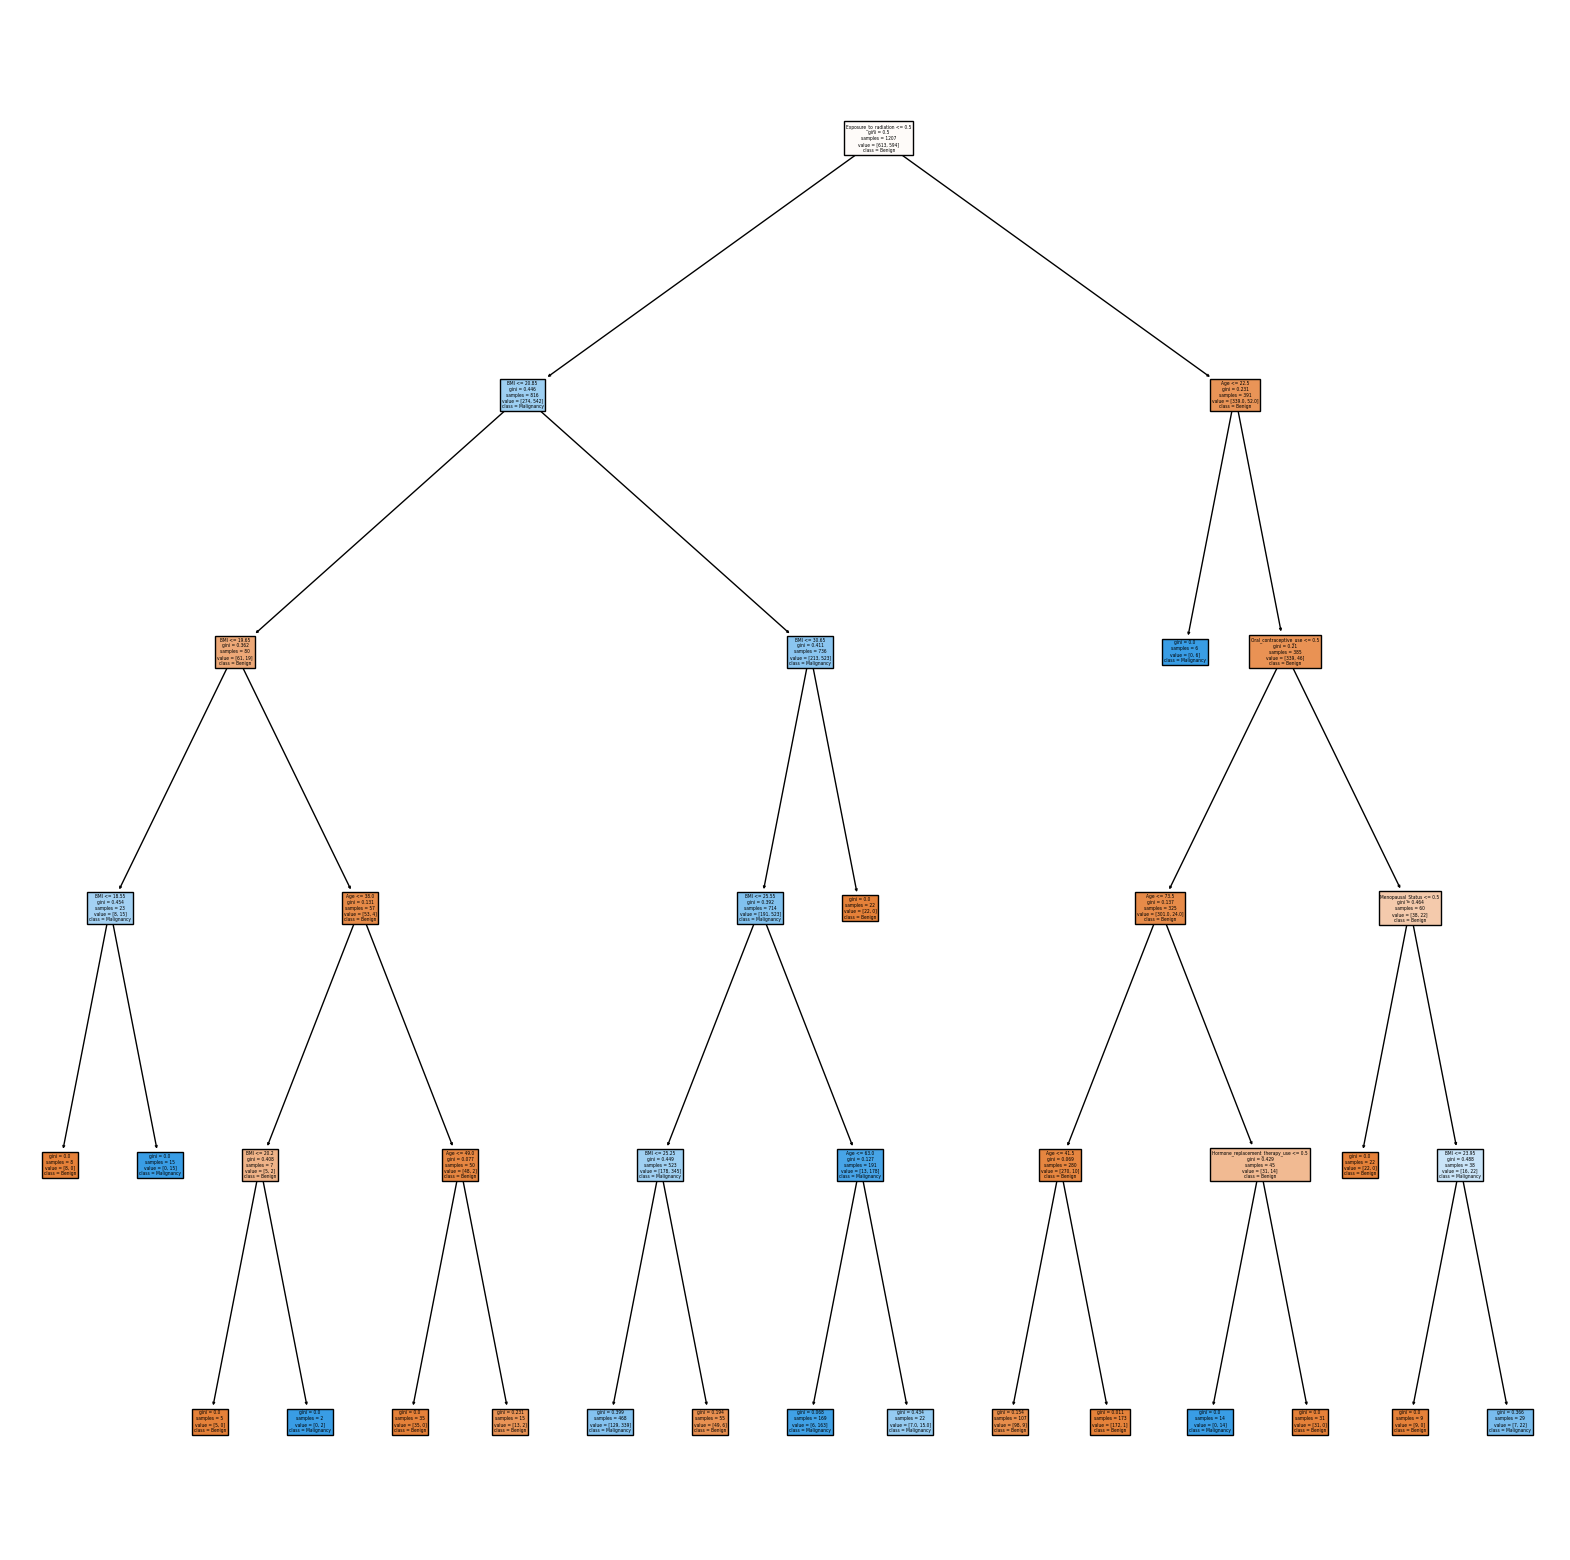

In [34]:
plt.figure(figsize=(20,20))
plot_tree(clf_c45_gini, feature_names=list(X.columns), class_names=["Benign", "Malignancy"], filled=True)
plt.show()

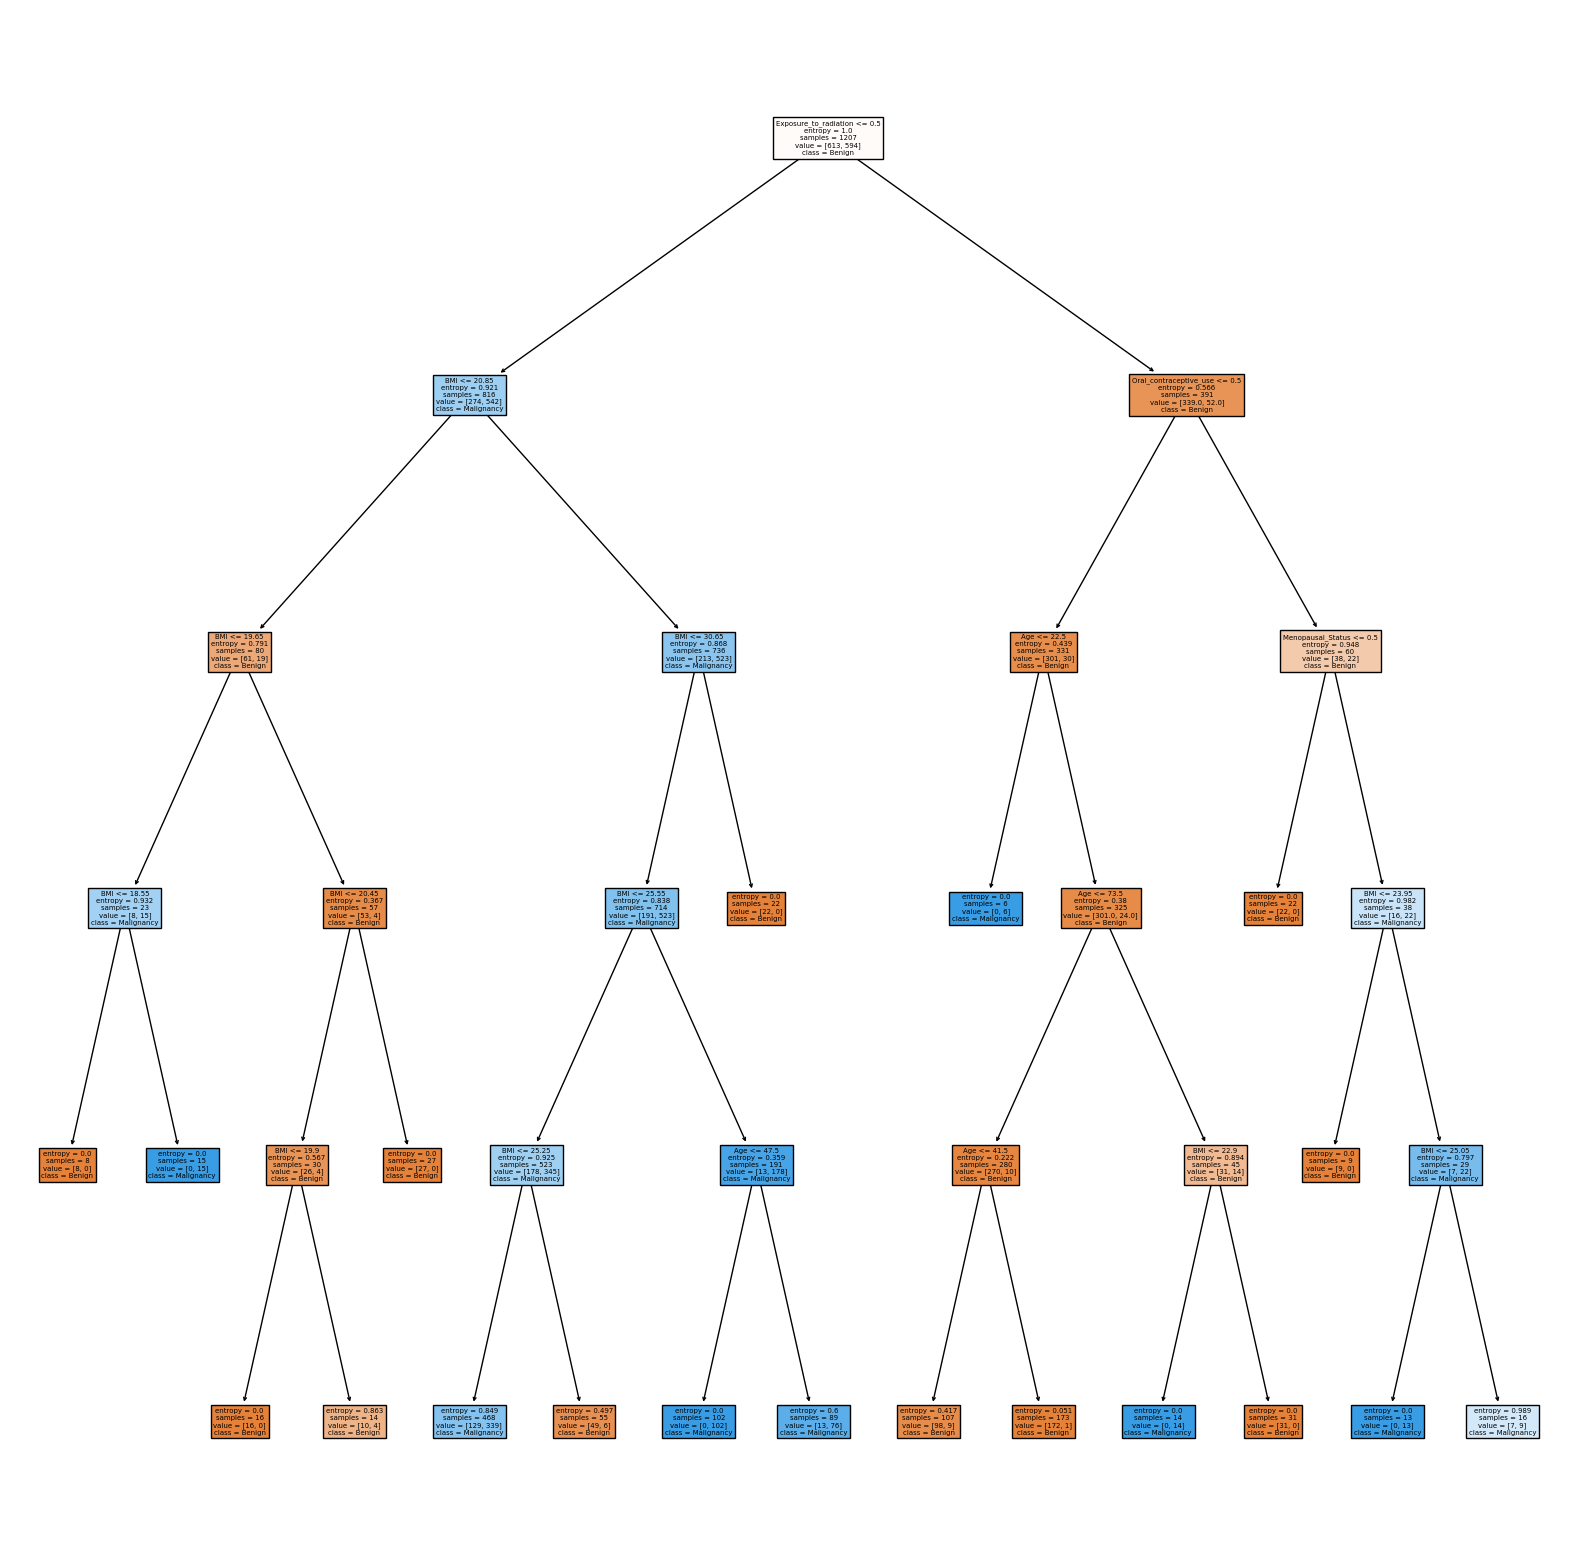

In [35]:
plt.figure(figsize=(20,20))
plot_tree(clf_c45_entropy, feature_names=list(X.columns), class_names=["Benign", "Malignancy"], filled=True)
plt.show()

Gini index dari variabel target (Diagnosis_Status) adalah 0.4985. Fitur 'BMI' memiliki information gain tertinggi sebesar 0.2852 menurut indeks Gini, diikuti oleh 'Age' (0.1530) dan 'Exposure_to_radiation' (0.1142), menunjukkan fitur-fitur ini sangat informatif. Sebaliknya, fitur seperti 'Family_history_of_breast_cancer' dan 'Hormone_replacement_therapy_use' memiliki information gain yang sangat rendah atau nol, sehingga kurang bermanfaat untuk prediksi.

Berdasarkan analisis entropi dan Gini index terhadap variabel target (Diagnosis_Status), ditemukan bahwa fitur 'BMI' merupakan yang paling informatif dengan nilai information gain tertinggi dalam kedua metode (0.5436 untuk entropi dan 0.2852 untuk Gini). Fitur 'Age' dan 'Exposure_to_radiation' juga menunjukkan kontribusi signifikan dalam kedua pendekatan. Sebaliknya, fitur seperti 'Family_history_of_breast_cancer' dan 'Hormone_replacement_therapy_use' menunjukkan nilai information gain yang sangat rendah atau nol, sehingga kurang bermanfaat untuk prediksi Diagnosis_Status. Hal ini menegaskan pentingnya fitur 'BMI', 'Age', dan 'Exposure_to_radiation' dalam model prediktif ini.

## Model Evaluation

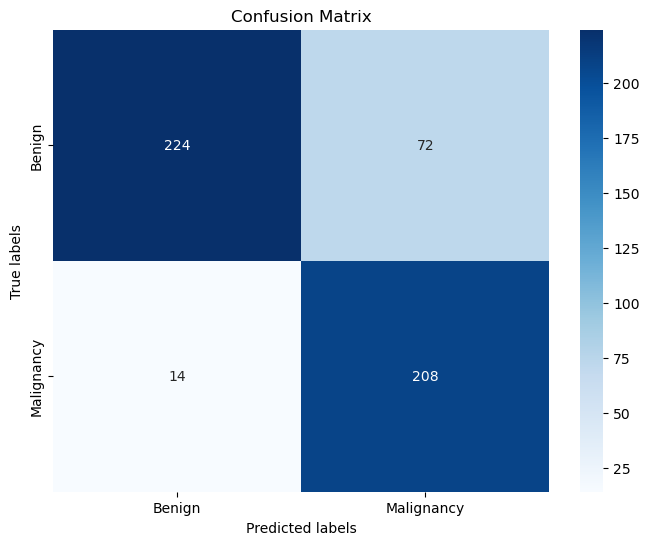

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Benign', 'Malignancy'], yticklabels=['Benign', 'Malignancy'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Dalam matriks kebingungan tersebut, terlihat bahwa terdapat 224 kasus yang secara tepat diprediksi sebagai positif (true positives), 14 kasus yang salah diprediksi sebagai negatif (false negatives), 72 kasus yang salah diprediksi sebagai positif (false positives), dan 208 kasus yang secara tepat diprediksi sebagai negatif (true negatives).

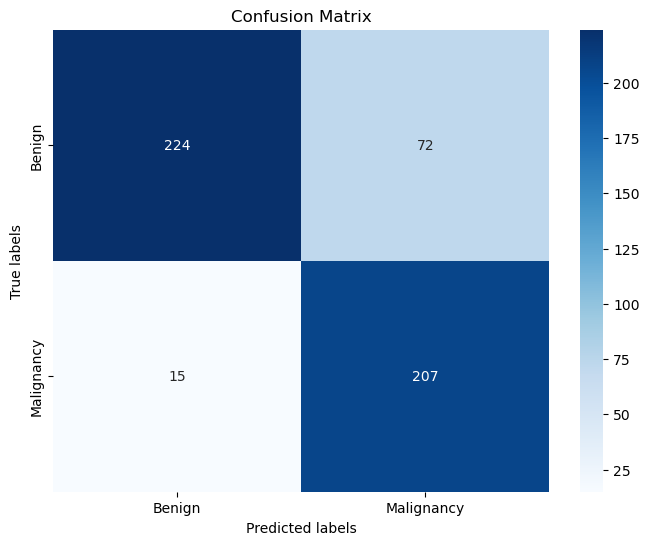

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Benign', 'Malignancy'], yticklabels=['Benign', 'Malignancy'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Dalam matriks kebingungan tersebut, terdapat 224 prediksi positif yang tepat (true positives), 15 prediksi negatif yang salah (false negatives), 72 prediksi positif yang salah (false positives), dan 207 prediksi negatif yang tepat (true negatives). 

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision1 = precision_score(y_test, y_pred_gini)
recall1 = recall_score(y_test, y_pred_gini)
f1_gini = f1_score(y_test, y_pred_gini)

print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_gini)

Precision: 0.7428571428571429
Recall: 0.9369369369369369
F1 Score: 0.8286852589641435


In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision2 = precision_score(y_test, y_pred_entropy)
recall2 = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)

print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_entropy)

Precision: 0.7419354838709677
Recall: 0.9324324324324325
F1 Score: 0.8263473053892215


Berdasarkan hasil akurasi yang menggunakan kriteria 'Gini' dan 'Entropy', terlihat bahwa F1 Score untuk kriteria 'Gini' lebih tinggi dibandingkan dengan 'Entropy'. Oleh karena itu, dapat disimpulkan bahwa kriteria 'Gini' menghasilkan akurasi yang lebih tinggi dan lebih efektif dalam memisahkan data dibandingkan dengan kriteria 'Entropy'.

In [40]:
from sklearn.tree import export_graphviz
export_graphviz(clf_c45_gini, out_file="tree.clf4.5_gini", class_names=["Benign","Malignancy"],
               feature_names=list(X_train.columns), impurity=False, filled=True)

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(clf_c45_entropy, out_file="tree.clf4.5_entropy", class_names=["Benign","Malignancy"],
               feature_names=list(X_train.columns), impurity=False, filled=True)

## Visualisasi Decision Tree Zoomed In

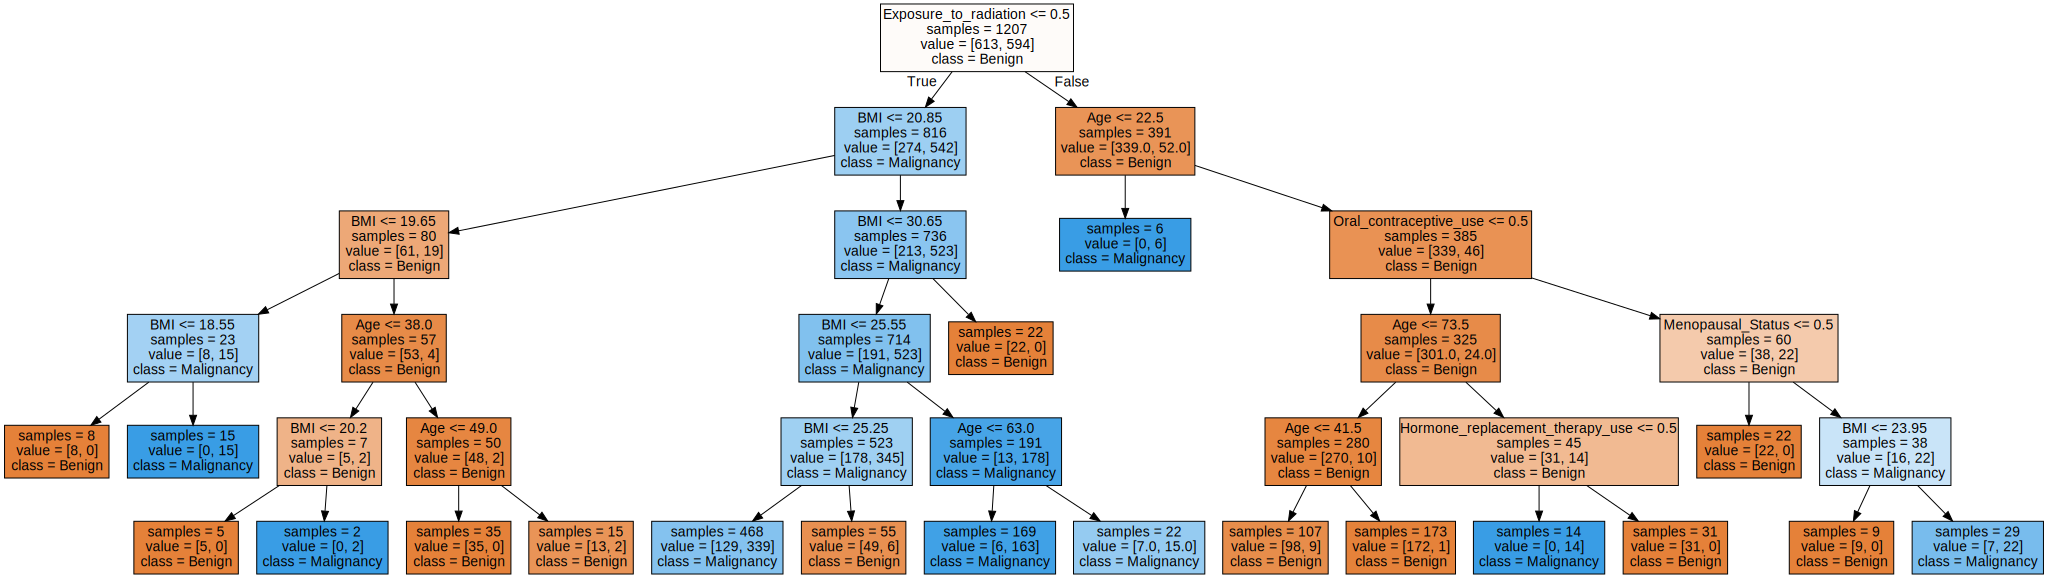

In [42]:
import graphviz

with open("tree.clf4.5_gini") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

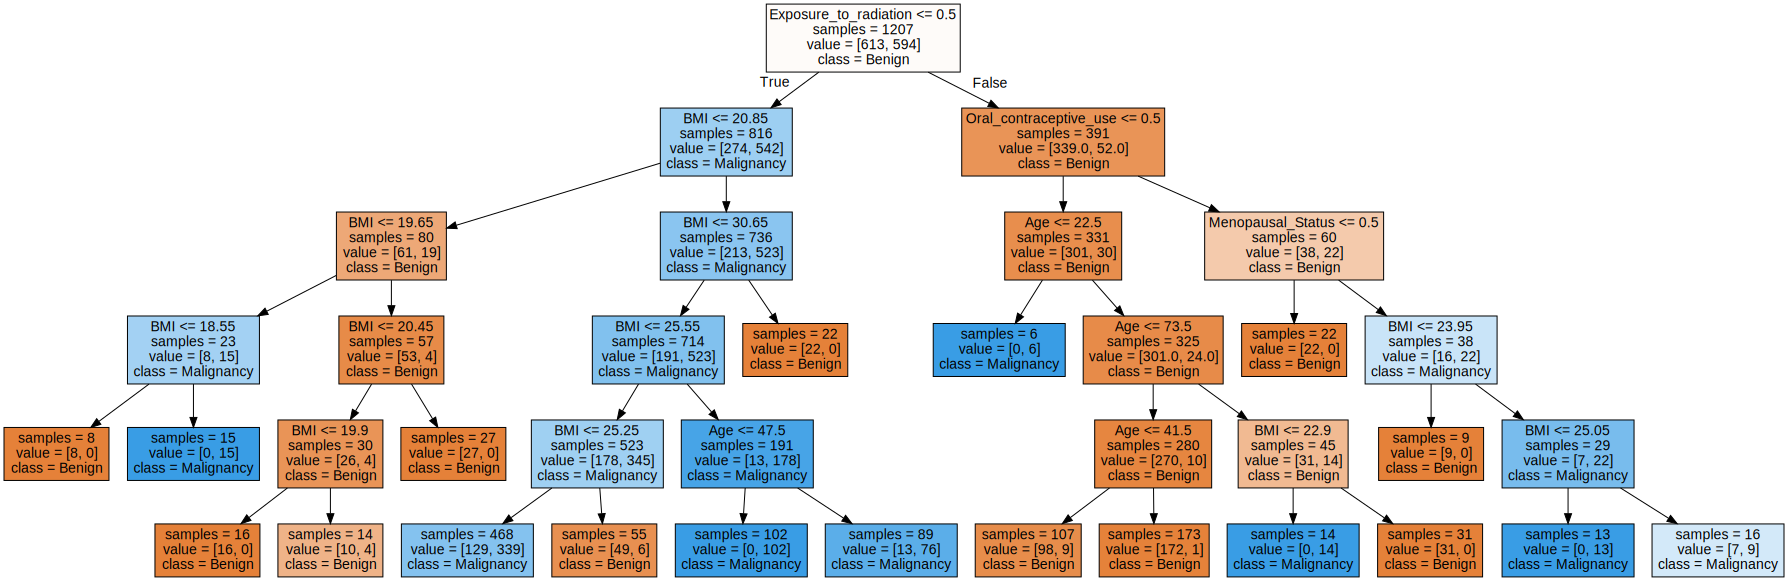

In [43]:
import graphviz

with open("tree.clf4.5_entropy") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

In [44]:
print ("Features importances:\n{}". format(clf_c45_gini.feature_importances_))

Features importances:
[0.0570269  0.         0.         0.         0.02652802 0.05478339
 0.02466883 0.41326631 0.         0.42372654]


Output pada kode diatas menunjukkan kontribusi masing-masing fitur dalam pembuatan keputusan oleh model. Setiap angka yang terkait dengan fitur menunjukkan seberapa besar kontribusi fitur tersebut dalam membuat prediksi. Misalnya, nilai 0.468 dan 0.423 menunjukkan bahwa fitur tersebut memiliki kontribusi yang signifikan dalam pembuatan keputusan oleh model.

In [45]:
print ("Features importances:\n{}". format(clf_c45_entropy.feature_importances_))

Features importances:
[0.10289827 0.         0.         0.         0.03024098 0.
 0.0294961  0.4752849  0.         0.36207975]


Output pada kode diatas menunjukkan kontribusi masing-masing fitur dalam pembuatan keputusan oleh model. Setiap angka yang terkait dengan fitur menunjukkan seberapa besar kontribusi fitur tersebut dalam membuat prediksi. Misalnya, nilai 0.413 dan 0.362 menunjukkan bahwa fitur tersebut memiliki kontribusi yang signifikan dalam pembuatan keputusan oleh model.

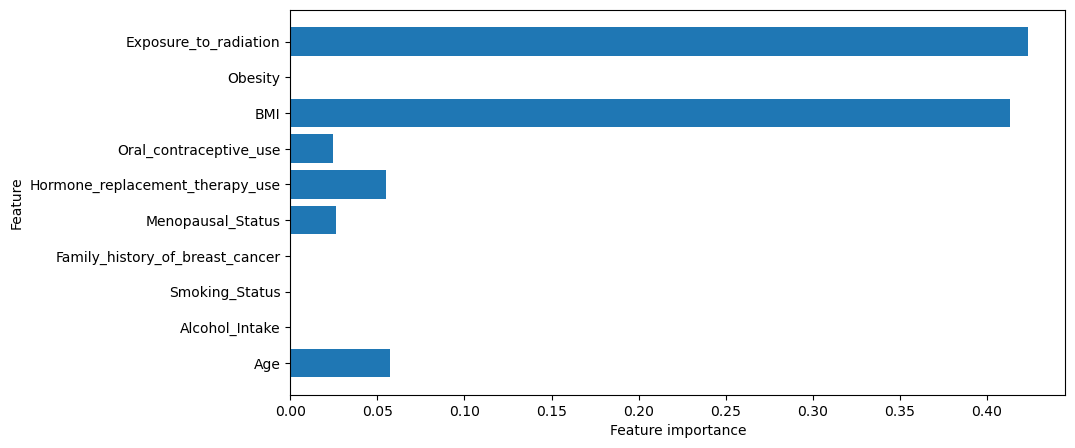

In [46]:
def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(clf_c45_gini)

Pada criterion ‘gini’ visualisasi diatas ditunjukan beberapa fitur yang memiliki tingkat kepentingan yang tinggi seperti ‘umur’, ‘BMI’, dan juga ‘Exposure_to_radiation’. Pada bar chart tersebut terlihat bahwa fitur yang memiliki pengaruh tertinggi pada klasifikasi adalah fitur ‘BMI’.

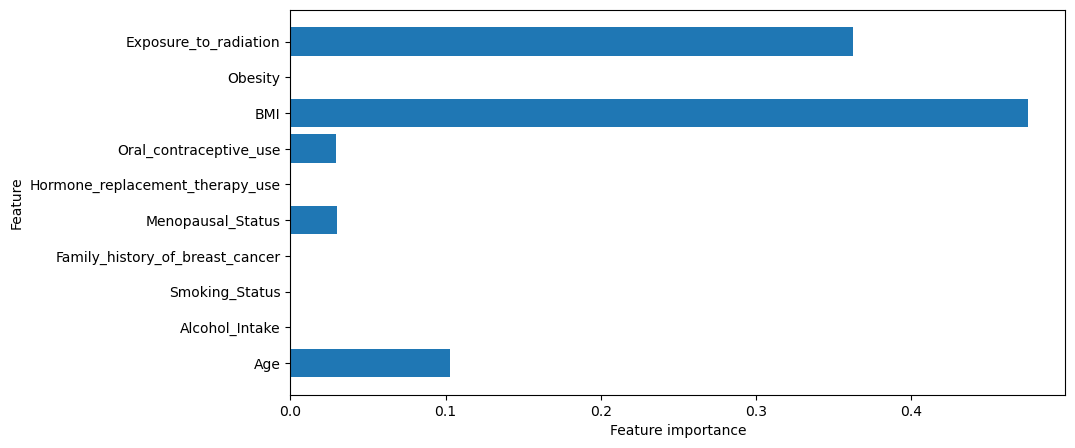

In [47]:
def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(clf_c45_entropy)

Pada criterion ‘entropy’ visualisasi diatas ditunjukan beberapa fitur yang memiliki tingkat kepentingan yang tinggi seperti ‘umur’, ‘BMI’, dan juga ‘Exposure_to_radiation’. Nilai kepentingan pada bar chart ini terlihat mirip dengan feature importance criterion ‘gini’ tetapi memiliki perbedaan dimana nilai fitur dengan kepentingan tertinggi terdapat pada fitur ‘BMI’. 

### Export Decision Tree Visual

In [48]:
import graphviz

with open("tree.clf4.5_gini") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph, format='png')
graph.render("decision_tree_output_gini")

'decision_tree_output_gini.png'

In [49]:
import graphviz

with open("tree.clf4.5_entropy") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph, format='png')
graph.render("decision_tree_output_entropy")

'decision_tree_output_entropy.png'

### Model Validation

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

X = data.drop(columns=['Diagnosis_Status'])
y = data['Diagnosis_Status']

clf_c45_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')
cv_scores_gini = cross_val_score(clf_c45_gini, X, y, cv=5)
mean_cv_score_gini = np.mean(cv_scores_gini)

print("Mean Cross-Validation Score (Gini):", mean_cv_score_gini)

clf_c45_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy')
cv_scores_entropy = cross_val_score(clf_c45_entropy, X, y, cv=5)
mean_cv_score_entropy = np.mean(cv_scores_entropy)

print("Mean Cross-Validation Score (Entropy):", mean_cv_score_entropy)

Mean Cross-Validation Score (Gini): 0.8469565217391304
Mean Cross-Validation Score (Entropy): 0.8400000000000001


membagi dataset menjadi 5 fold. Pada setiap iterasi, model dilatih menggunakan 4 fold dan diuji pada fold yang tersisa. Skor cross-validation untuk setiap kriteria kemudian dihitung rata-ratanya, dan hasil rata-rata tersebut dicetak. Output menunjukkan bahwa model Decision Tree memiliki skor rata-rata cross-validation sebesar 0.846 untuk kriteria Gini dan 0.840 untuk kriteria Entropy. Hal ini mengindikasikan bahwa kriteria Gini memiliki kinerja yang sedikit lebih baik pada dataset yang digunakan dibandingkan dengan kriteria Entropy.

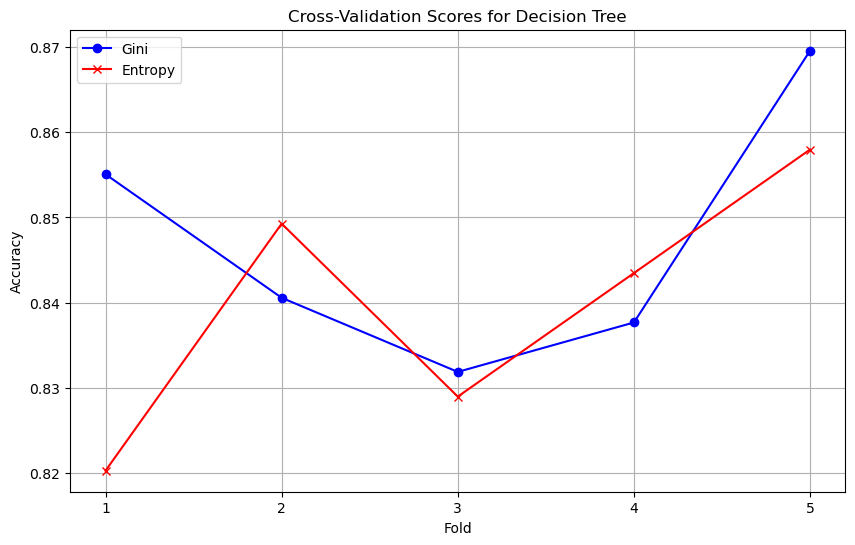

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(range(1, 6), cv_scores_gini, marker='o', label='Gini', color='blue')

plt.plot(range(1, 6), cv_scores_entropy, marker='x', label='Entropy', color='red')

plt.title('Cross-Validation Scores for Decision Tree')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6, 1))
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import numpy as np

def entropy(y):
    """Calculate the entropy of a target variable"""
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probs = class_counts / len(y)
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

def information_gain(X, y, feature_idx):
    """Calculate the information gain for a specific feature"""
    parent_entropy = entropy(y)
    ""
    unique_values, value_counts = np.unique(X[:, feature_idx], return_counts=True)
    
    children_entropy = 0
    for value, count in zip(unique_values, value_counts):
        child_entropy = entropy(y[X[:, feature_idx] == value])
        children_entropy += (count / len(y)) * child_entropy
    
    information_gain = parent_entropy - children_entropy
    return information_gain

target_entropy = entropy(df['Diagnosis_Status'].values)
print("Entropy of target variable (Diagnosis_Status):", target_entropy)

features = df.drop(columns=['Diagnosis_Status']).values
for i, feature in enumerate(df.columns[:-1]):
    gain = information_gain(features, df['Diagnosis_Status'].values, i)
    print("Information Gain for feature '{}': {:.4f}".format(feature, gain))


Entropy of target variable (Diagnosis_Status): 0.9979023026797438
Information Gain for feature 'Age': 0.2794
Information Gain for feature 'Alcohol_Intake': 0.0030
Information Gain for feature 'Smoking_Status': 0.0131
Information Gain for feature 'Family_history_of_breast_cancer': 0.0000
Information Gain for feature 'Menopausal_Status': 0.0040
Information Gain for feature 'Hormone_replacement_therapy_use': 0.0011
Information Gain for feature 'Oral_contraceptive_use': 0.0029
Information Gain for feature 'Breast_Swelling': 0.0075
Information Gain for feature 'Breast_Lump': 0.0002
Information Gain for feature 'Breast_Pain': 0.0037
Information Gain for feature 'BMI': 0.5436
Information Gain for feature 'Obesity': 0.0128
Information Gain for feature 'Exposure_to_radiation': 0.1795
Information Gain for feature 'Breast_Feeding': 0.0005


Entropi dari variabel target (Diagnosis_Status) adalah 0.9979. Fitur 'BMI' memiliki information gain tertinggi sebesar 0.5436, diikuti oleh 'Age' (0.2794) dan 'Exposure_to_radiation' (0.1795), yang menunjukkan bahwa fitur-fitur ini sangat informatif untuk prediksi. Sebaliknya, fitur seperti 'Family_history_of_breast_cancer' dan 'Hormone_replacement_therapy_use' memiliki information gain sangat rendah, sehingga kurang berguna untuk prediksi.

In [53]:
import numpy as np

def gini(y):
    """Calculate the Gini index of a target variable"""
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probs = class_counts / len(y)
    gini = 1 - np.sum(probs ** 2)
    return gini

def information_gain_gini(X, y, feature_idx):
    """Calculate the information gain for a specific feature using Gini index"""
    parent_gini = gini(y)
    
    unique_values, value_counts = np.unique(X[:, feature_idx], return_counts=True)
    
    children_gini = 0
    for value, count in zip(unique_values, value_counts):
        child_gini = gini(y[X[:, feature_idx] == value])
        children_gini += (count / len(y)) * child_gini
    
    information_gain_gini = parent_gini - children_gini
    return information_gain_gini

import pandas as pd

y = df['Diagnosis_Status'].values
X = df.drop(columns=['Diagnosis_Status']).values

target_gini = gini(y)
print("Gini index of target variable (Diagnosis_Status):", target_gini)

for i, feature in enumerate(df.columns[:-1]):
    gain_gini = information_gain_gini(X, y, i)
    print("Information Gain for feature '{}' (gini): {:.4f}".format(feature, gain_gini))

Gini index of target variable (Diagnosis_Status): 0.4985466918714556
Information Gain for feature 'Age' (gini): 0.1530
Information Gain for feature 'Alcohol_Intake' (gini): 0.0020
Information Gain for feature 'Smoking_Status' (gini): 0.0087
Information Gain for feature 'Family_history_of_breast_cancer' (gini): 0.0000
Information Gain for feature 'Menopausal_Status' (gini): 0.0028
Information Gain for feature 'Hormone_replacement_therapy_use' (gini): 0.0007
Information Gain for feature 'Oral_contraceptive_use' (gini): 0.0020
Information Gain for feature 'Breast_Swelling' (gini): 0.0051
Information Gain for feature 'Breast_Lump' (gini): 0.0002
Information Gain for feature 'Breast_Pain' (gini): 0.0025
Information Gain for feature 'BMI' (gini): 0.2852
Information Gain for feature 'Obesity' (gini): 0.0082
Information Gain for feature 'Exposure_to_radiation' (gini): 0.1142
Information Gain for feature 'Breast_Feeding' (gini): 0.0004


## Kesimpulan

<div align="justify">Analisis mendalam terhadap faktor-faktor yang mempengaruhi jenis kanker payudara telah mengungkapkan bahwa atribut seperti Indeks Massa Tubuh (BMI), paparan terhadap faktor risiko, dan usia memiliki pengaruh signifikan dalam proses identifikasi. Penemuan ini menegaskan pentingnya ketiga variabel tersebut dalam memprediksi jenis kanker payudara, memberikan wawasan baru dalam penelitian medis. Lebih lanjut, penggunaan algoritma Decision Tree C4.5 dengan Gini Index sebagai kriteria pemilihan fitur telah terbukti sangat efektif. Evaluasi komprehensif melalui akurasi, confusion matrix, dan skor F1 menunjukkan performa yang luar biasa dari model ini, dengan akurasi yang mencapai 83% dan skor F1 yang mengesankan sebesar 0.828. Khususnya, confusion matrix memperlihatkan kemampuan model yang cemerlang dalam membedakan antara kelas "benign" dan "malign". Dibandingkan dengan model yang menggunakan kriteria Entropy, model berbasis Gini Index ini sedikit lebih baik dalam meningkatkan akurasi prediksi dan menjaga keseimbangan antara presisi dan recall. Hasil prediksi yang dihasilkan oleh algoritma Decision Tree C4.5 tidak hanya memberikan klasifikasi yang intuitif antara tumor "Benign" dan "Malignancy", tetapi juga menyoroti fitur penting lainnya. Algoritma ini tidak hanya memudahkan interpretasi bagi para praktisi medis, tetapi juga memberikan kontribusi yang berharga dalam proses diagnosis dan pengobatan kanker payudara. Dengan menyediakan informasi yang akurat dan tepat waktu, algoritma ini memungkinkan penanganan yang lebih efektif, di mana tumor yang bersifat benign memerlukan pemantauan rutin dan manajemen gejala, sedangkan tumor yang diklasifikasikan sebagai malignancy membutuhkan intervensi medis yang lebih intensif, seperti operasi, kemoterapi, atau radioterapi, sesuai dengan rencana perawatan individual pasien.</div>